In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.shape

(4340, 8)

In [5]:
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [6]:
##NAN values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [8]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [9]:
t_dataset=df[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner']]

In [10]:
from datetime import date
t_dataset['car_age']=date.today().year-t_dataset['year']
t_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,15
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,15
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,10
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,5
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,8


In [11]:
t_dataset.drop(['year'],axis=1,inplace=True)
t_dataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,60000,70000,Petrol,Individual,Manual,First Owner,15
1,135000,50000,Petrol,Individual,Manual,First Owner,15
2,600000,100000,Diesel,Individual,Manual,First Owner,10
3,250000,46000,Petrol,Individual,Manual,First Owner,5
4,450000,141000,Diesel,Individual,Manual,Second Owner,8


In [12]:
t_dataset=pd.get_dummies(t_dataset,drop_first=True)

In [13]:
t_dataset.head()

,selling_price,km_driven,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,15,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,15,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,10,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,5,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,8,1,0,0,0,1,0,1,0,1,0,0


In [14]:
t_dataset.corr()

,selling_price,km_driven,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.192289,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,-0.078725,-0.161986,0.048799,-0.111326
km_driven,-0.192289,1.000000,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.097349,0.195203,-0.083445,0.194713
car_age,-0.413922,0.419688,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,0.186361,0.292349,-0.095795,0.244308
fuel_Diesel,0.282947,0.285396,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.005095,-0.001372,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,-0.042434,0.036652,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.269453,-0.291139,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,-0.236798,0.182663,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
seller_type_Trustmark Dealer,0.110176,-0.089858,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578
transmission_Manual,-0.530205,0.120226,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,0.035597,0.068068,0.009152,0.030802


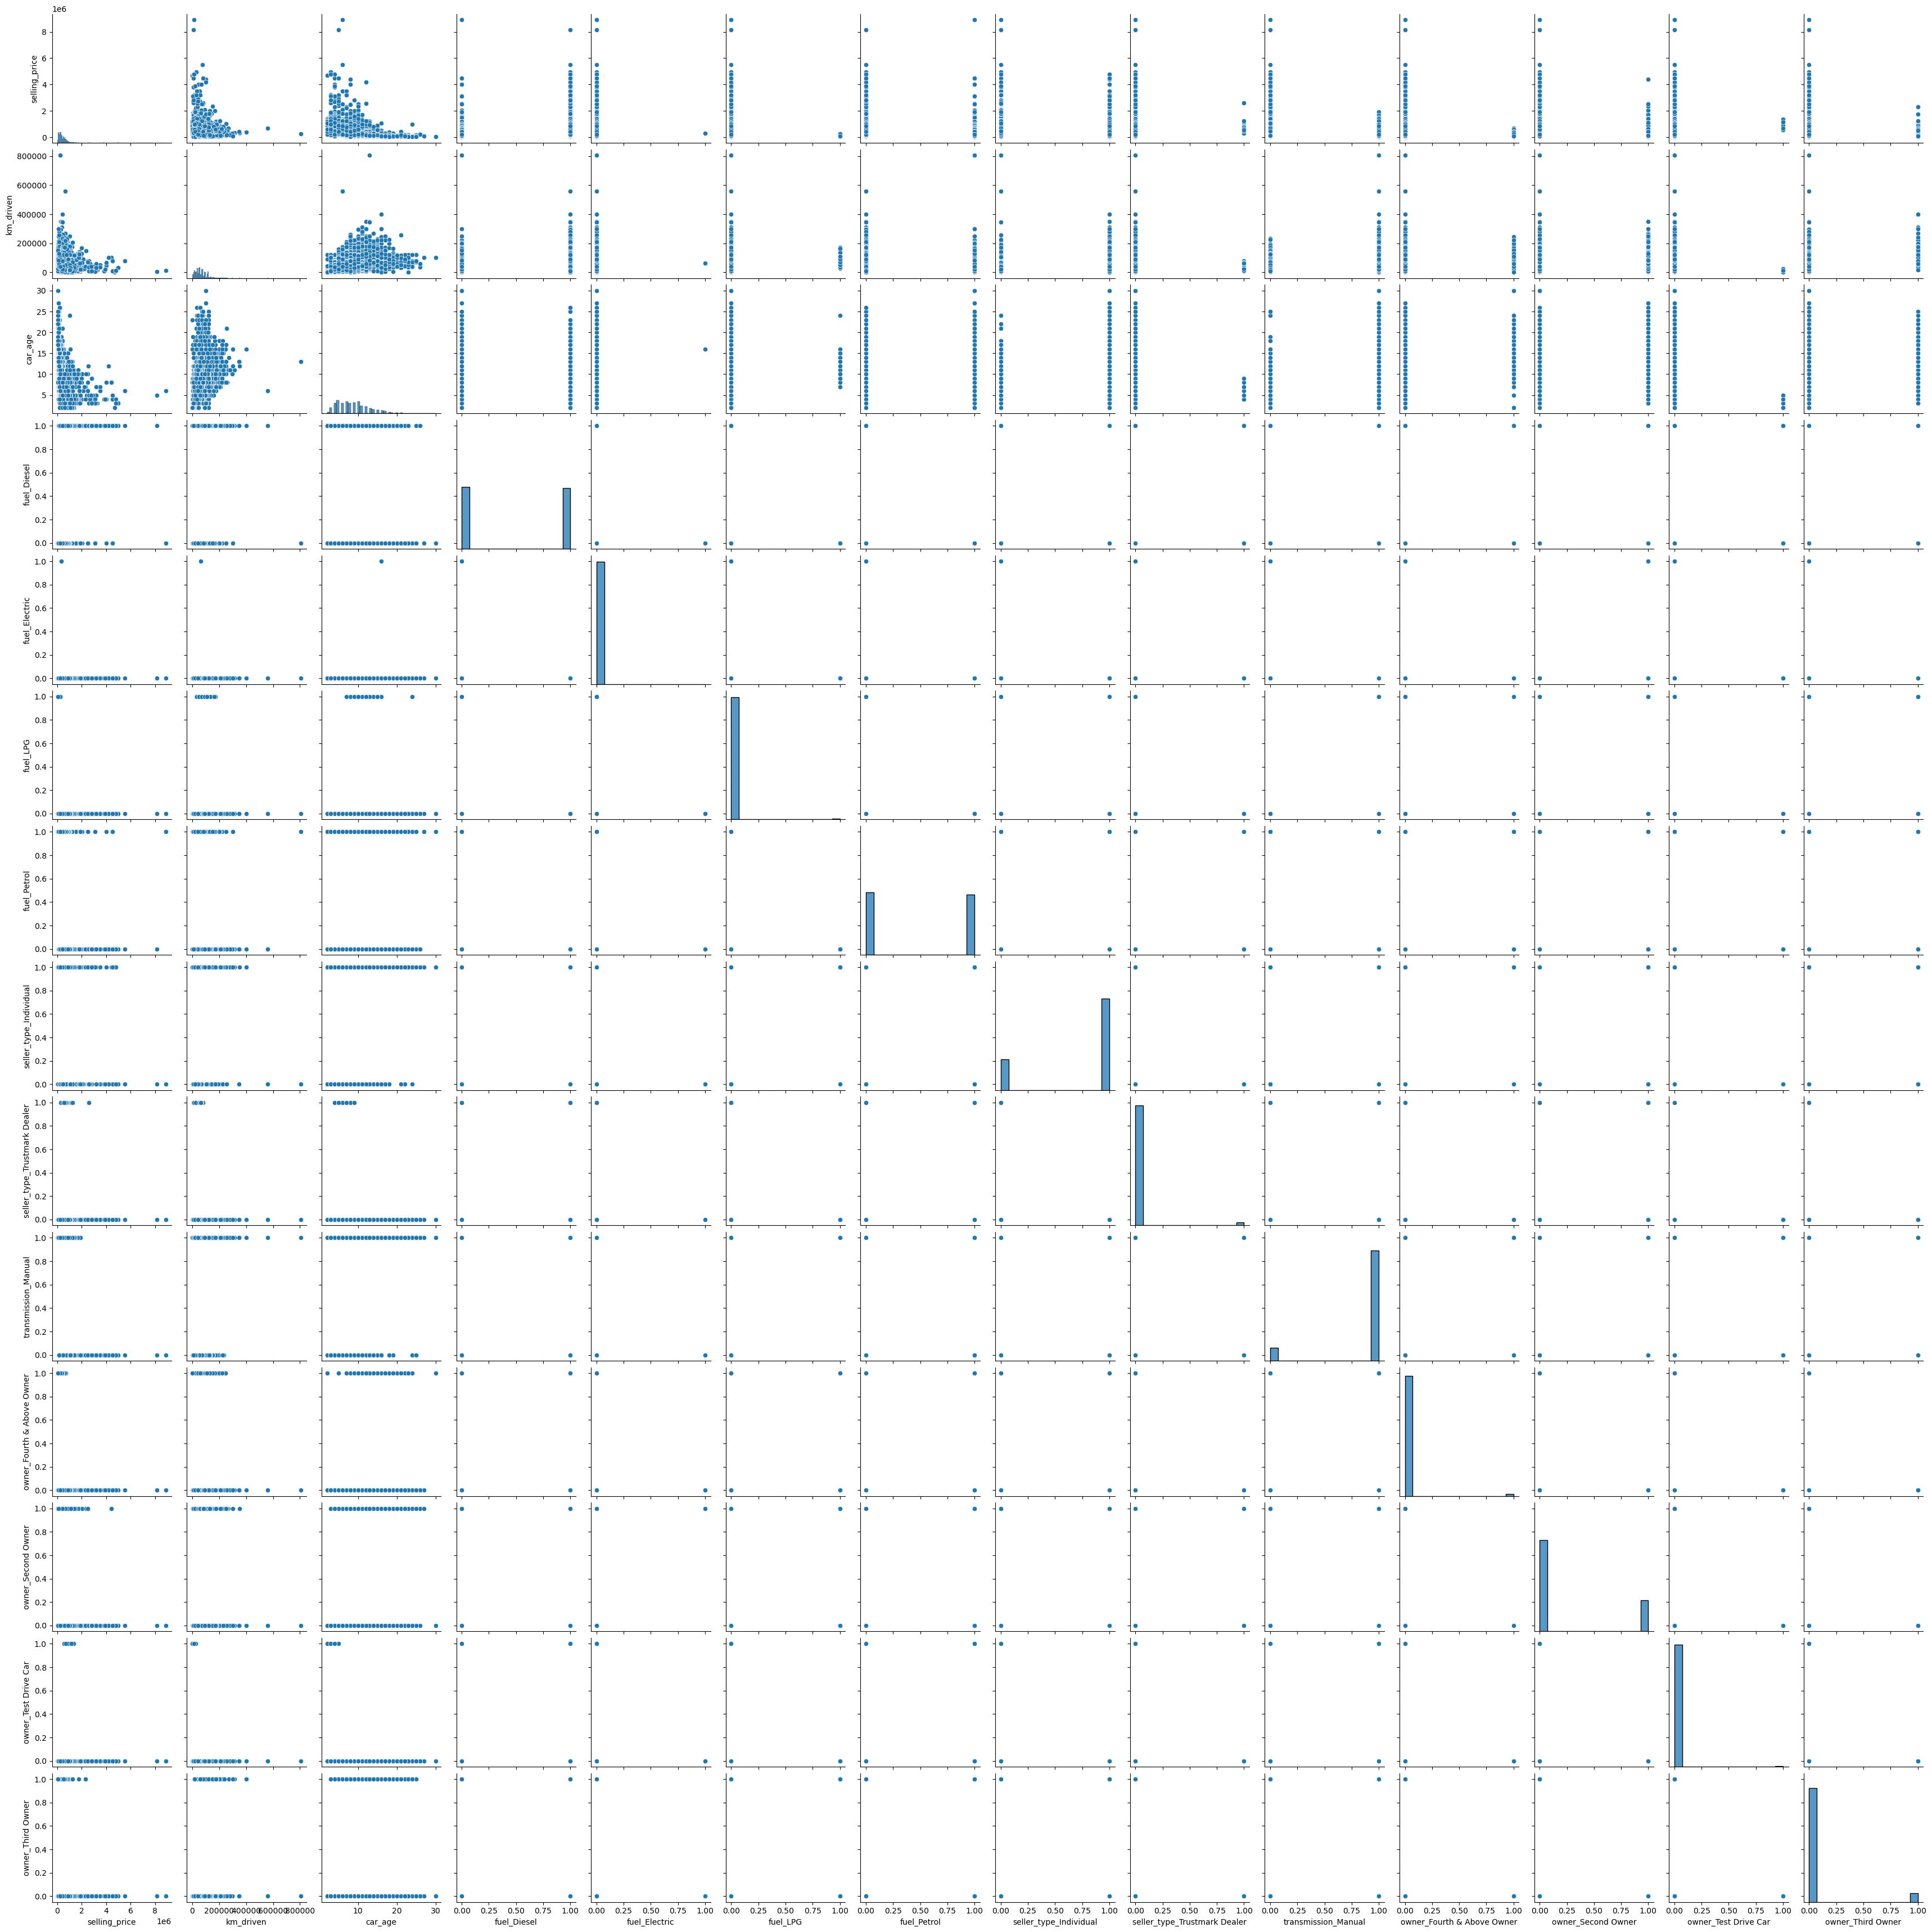

In [15]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(t_dataset)
plt.show()

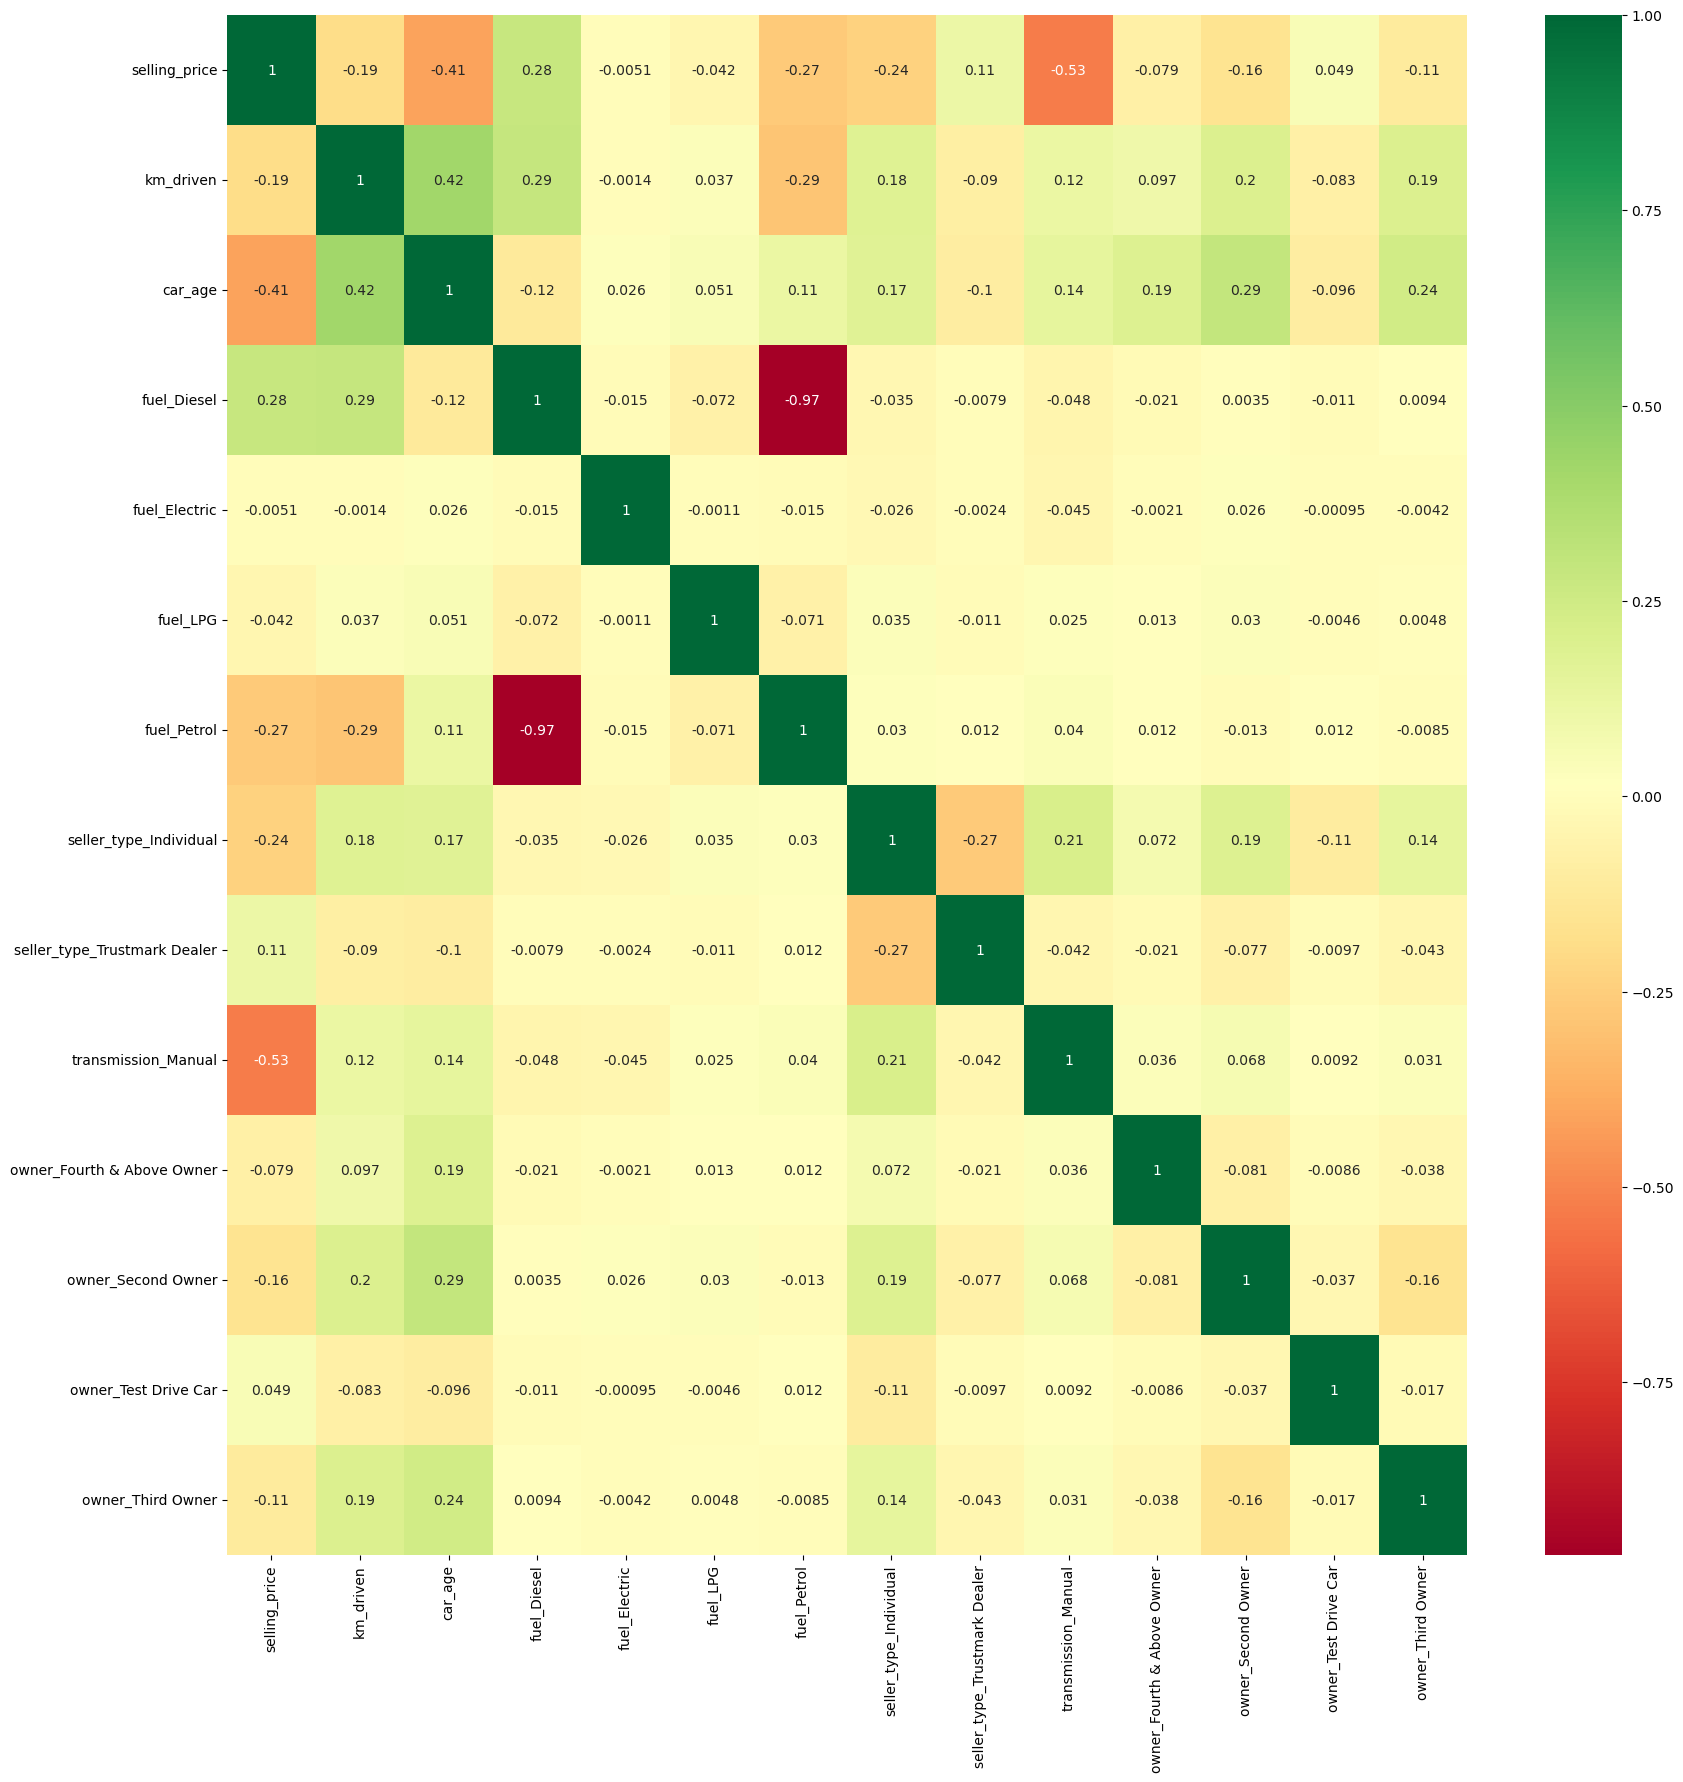

In [16]:
corrmat=t_dataset.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(t_dataset[top_corr_feature].corr(),annot=True,cmap="RdYlGn")

In [17]:
t_dataset.head()

,selling_price,km_driven,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,15,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,15,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,10,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,5,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,8,1,0,0,0,1,0,1,0,1,0,0


In [18]:
#Dependent vs Independent
X=t_dataset.iloc[:,1:]
Y=t_dataset.iloc[:,0]
# X.head()
Y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [19]:
## important fields or option
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [20]:
print(model.feature_importances_)

[2.45431787e-01 2.45023313e-01 1.29641387e-01 3.37246238e-05
 2.57901392e-05 2.12653602e-04 4.85676927e-02 8.88367520e-03
 2.92836678e-01 7.91265804e-04 2.31371441e-02 7.20131393e-04
 4.69475787e-03]


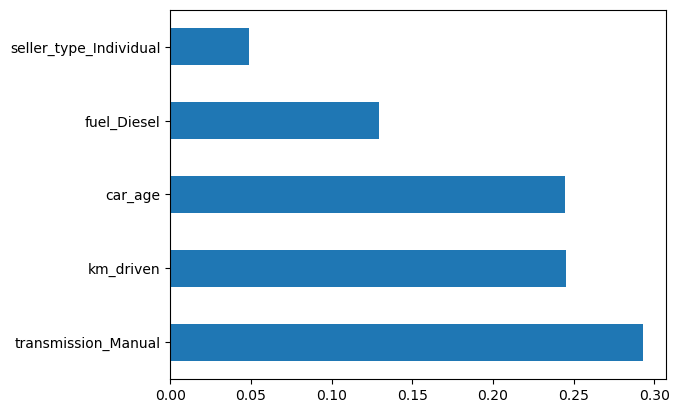

In [21]:
#important feild graphical view
f_imp=pd.Series(model.feature_importances_,index=X.columns)
f_imp.nlargest(5).plot(kind='barh')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [23]:
X_train.shape

(3472, 13)

In [24]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
rf_random=RandomForestRegressor()
#Hypeparamter
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

In [25]:
 #Grid Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = [1.0, 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [26]:
#zip to temp_dict ===Create the random Grid====
random_grid={
        'n_estimators':n_estimators,
        'max_features':max_features,
        'max_depth':max_depth,
        'min_samples_split':min_samples_split,
        'min_samples_leaf':min_samples_leaf
}

In [27]:
rf=RandomForestRegressor()

In [36]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',cv=5,n_iter=10,verbose=2,random_state=42,n_jobs=1)

In [37]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': [1.0, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [45]:
prediction=rf_random.predict(X_test)

In [46]:
X_test.head()

,km_driven,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
1400,50000,12,0,0,0,1,1,0,1,0,0,0,1
1599,70000,6,0,0,0,1,1,0,1,0,1,0,0
226,120000,10,1,0,0,0,1,0,1,0,0,0,0
1543,5000,3,0,0,0,1,1,0,1,0,0,0,0
451,80000,10,1,0,0,0,1,0,1,0,1,0,0


C:\Users\ragur\AppData\Local\Temp\ipykernel_22680\164273100.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test-prediction)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

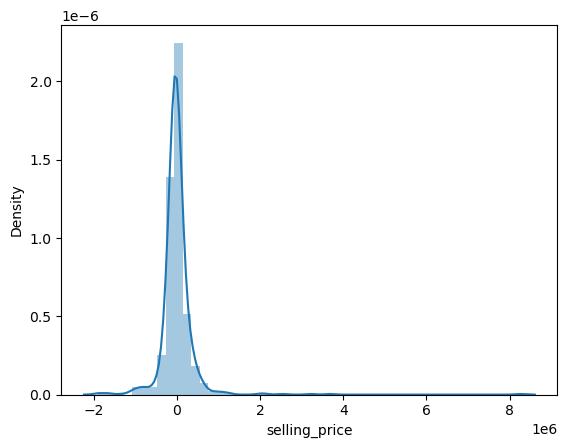

In [39]:
sns.distplot(Y_test-prediction)

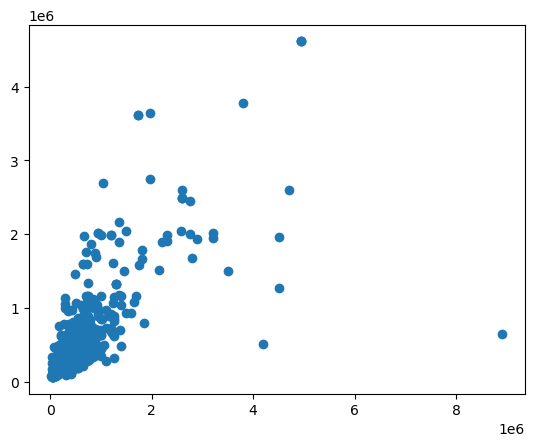

In [41]:
plt.scatter(Y_test,prediction)

In [44]:
import pickle
file=open('random_forest_regression_model.pkl','wb')

pickle.dump(rf_random,file)